In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
#load the cleaned training data
train_data = pd.read_csv('cleaned_training_data.csv')

In [3]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(train_data['tweets'],
                                                 train_data['emotions'], 
                                                 test_size = 0.2, 
                                                 random_state = 123)

In [4]:
#vectorise the data using Tf-idf
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8, 
                             sublinear_tf = True, 
                             use_idf = True)

#transform the data
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [ ]:
#training data
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_vectors,y_train)

In [9]:
#save model to disk 
filename = 'finalized_model.pkl'
pickle.dump(svclassifier, open(filename, 'wb'))

NameError: name 'svclassifier' is not defined

In [5]:
#load the model
loded_model = pickle.load(open('finalized_model.pkl', 'rb'))

In [6]:
#test data using split data
y_pred = loded_model.predict(test_vectors)

#print the model accuracy
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_test))

svm using tfidf accuracy 0.958079745179455


In [8]:
#print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9627    0.9798    0.9712     17449
          1     0.9374    0.9439    0.9406      3189
          2     0.9619    0.9595    0.9607      6128
          3     0.9502    0.9196    0.9346      3296
          4     0.9510    0.9225    0.9365      3302
          5     0.9632    0.9038    0.9326      1798

avg / total     0.9580    0.9581    0.9579     35162



In [9]:
#compute the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

<Figure size 720x576 with 0 Axes>

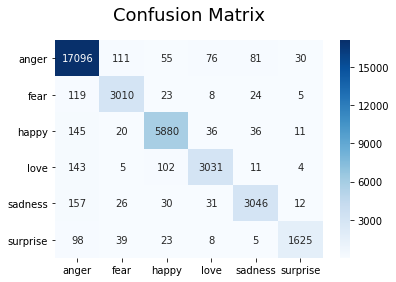

<Figure size 720x576 with 0 Axes>

In [10]:
#plotting the confusion matrix
categories = ['anger','fear','happy','love','sadness','surprise']

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = 'd', 
            xticklabels = categories, yticklabels = categories)

plt.title("Confusion Matrix", fontdict = {'size' : 18}, pad = 20)
plt.figure(figsize = (10,8))

# Classify Data

In [27]:
#load the extracted data
test_data = pd.read_csv('cleaned_data.csv')

In [28]:
#transform the data using Tf-idf vectorizer
text = vectorizer.transform(test_data['tweets'])

In [29]:
#predict the data
predict_data = loded_model.predict(text)

In [30]:
data = []
for date, user, tweet, pred in zip(test_data['Datetime'],
                                   test_data['username'],
                                   test_data['tweets'],predict_data):
    data.append((date,user,tweet,pred))

In [31]:
df = pd.DataFrame(data, columns = ['Datetime', 'username', 
                                   'tweets', 'emotions'])
df = df.replace([0,1,2,3,4,5], ['anger','fear','happy','love',
                                'sadness','surprise'])

In [32]:
df.head(1000)

,Datetime,username,tweets,emotions
0,7/6/2021,FlyFM958,if you put a frog in the water and slowly rais...,anger
1,7/6/2021,shrrr4,sebok psl kerajaan gagal but they be still cro...,anger
2,7/6/2021,MinElly287,insyaallah we can do this stay at home please,anger
3,7/6/2021,dinoyong,a bit of relief seeing this downtrend pray har...,anger
4,7/6/2021,miyanlov3,stay home ja tak payah merayau,anger
5,7/6/2021,RajaAmieraa,saya ni dah stay home tau tapi kes still juga ...,anger
6,7/6/2021,Syuk_RCs,walaupun ada turun please stay home lagi jgn...,anger
7,7/6/2021,IntanEdgar,i stay at home i only leave the house to get m...,anger
8,7/6/2021,neexxzz,friendly reminder kita belum menang stay at home,happy
9,7/6/2021,xhisa12,on nd tot i rather be at office than stay at h...,happy


In [33]:
df.to_csv('classified_data', sep=',', index=False)